- ## Length of Stay for each patient (Covide 19 )


### Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.

### This parameter helps hospitals to identify patients of high risk (patients who will stay longer) at the time of admission. Once identified, patients with high risk can have their treatment plan optimized to miminize and lower the chance of staff/visitor infection. Also, prior knowledge of can aid in logistics such as room and bed allocation planning.


- ### Variables : 
- Column	- Description
- case_id	- Case_ID registered in Hospital
- Hospital_code - Unique code for the Hospital
- Hospital_type_code - Unique code for the type of Hospital
- City_Code_Hospital	- City Code of the Hospital
- Hospital_region_code - Region Code of the Hospital
- Available Extra Rooms in Hospital - Number of Extra rooms available in the Hospital
- Department - Department overlooking the case
- Ward_Type	- Code for the Ward type
- Ward_Facility_Code	- Code for the Ward Facility
- Bed Grade	- Condition of Bed in the Ward
- patientid	- Unique Patient Id
- City_Code_Patient	- City Code for the patient
- Type of Admission	- Admission Type registered by the Hospital
- Severity of Illness	- Severity of the illness recorded at the time of admission
- Visitors with Patient	- Number of Visitors with the patient
- Age	- Age of the patient
- Admission_Deposit	- Deposit at the Admission Time
- Stay	- Stay Days by the patient


In [1]:
import numpy as np 
import pandas as pd 

In [2]:
from numpy import mean, std
import seaborn as sns
from matplotlib import *
from matplotlib import pyplot as plt
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

In [3]:
train_data = pd.read_csv(r'train_data.csv')
train_data.head()

case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0        1              8                  c                   3   
1        2              2                  c                   5   
2        3             10                  e                   1   
3        4             26                  b                   2   
4        5             26                  b                   2   

  Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0                    Z                                  3  radiotherapy   
1                    Z                                  2  radiotherapy   
2                    X                                  2    anesthesia   
3                    Y                                  2  radiotherapy   
4                    Y                                  2  radiotherapy   

  Ward_Type Ward_Facility_Code  Bed_Grade  patientid  City_Code_Patient  \
0         R                  F        2.0      31397                7.0   
1         S                  F        2.0      31397                7.0   
2         S                  E        2.0      31397                7.0   
3         R                  D        2.0      31397                7.0   
4         S                  D        2.0      31397                7.0   

  Type_of_Admission Severity of Illness  Visitors_with_Patient    Age  \
0         Emergency             Extreme                      2  51-60   
1            Trauma             Extreme                      2  51-60   
2            Trauma             Extreme                      2  51-60   
3            Trauma             Extreme                      2  51-60   
4            Trauma             Extreme                      2  51-60   

   Admission_Deposit   Stay  
0               4911   0-10  
1               5954  41-50  
2               4745  31-40  
3               7272  41-50  
4               5558  41-50

In [4]:
import pandas_profiling as pp
pp.ProfileReport(train_data)

In [4]:
test_data = pd.read_csv('test_data.csv')
test_data.head()

case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0   318439             21                  c                   3   
1   318440             29                  a                   4   
2   318441             26                  b                   2   
3   318442              6                  a                   6   
4   318443             28                  b                  11   

  Hospital_region_code  Available Extra Rooms in Hospital  Department  \
0                    Z                                  3  gynecology   
1                    X                                  2  gynecology   
2                    Y                                  3  gynecology   
3                    X                                  3  gynecology   
4                    X                                  2  gynecology   

  Ward_Type Ward_Facility_Code  Bed Grade  patientid  City_Code_Patient  \
0         S                  A        2.0      17006                2.0   
1         S                  F        2.0      17006                2.0   
2         Q                  D        4.0      17006                2.0   
3         Q                  F        2.0      17006                2.0   
4         R                  F        2.0      17006                2.0   

  Type of Admission Severity of Illness  Visitors with Patient    Age  \
0         Emergency            Moderate                      2  71-80   
1            Trauma            Moderate                      4  71-80   
2         Emergency            Moderate                      3  71-80   
3            Trauma            Moderate                      3  71-80   
4            Trauma            Moderate                      4  71-80   

   Admission_Deposit  
0             3095.0  
1             4018.0  
2             4492.0  
3             4173.0  
4             4161.0

In [5]:
test_data.rename(columns = {'Bed Grade':'Bed_Grade', 'Type of Admission':'Type_of_Admission','Visitors with Patient':'Visitors_with_Patient'}, inplace = True)

In [6]:
train_data.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed_Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type_of_Admission                     object
Severity of Illness                   object
Visitors_with_Patient                  int64
Age                                   object
Admission_Deposit                      int64
Stay                                  object
dtype: object

In [7]:
train_data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity of Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [8]:
train_data.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed_Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type_of_Admission                         3
Severity of Illness                       3
Visitors_with_Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

In [9]:
train_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'patientid', 'City_Code_Patient', 'Type_of_Admission',
       'Severity of Illness', 'Visitors_with_Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [10]:
# Unique values for all the columns
for col in train_data.columns[~(train_data.columns.isin(['case_id', 'patientid', 'admission_deposit']))].tolist():
    print(" Unique Values --> " + col, ':', len(train_data[col].unique()), ': ', train_data[col].unique())

 Unique Values --> Hospital_code : 32 :  [ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]
 Unique Values --> Hospital_type_code : 7 :  ['c' 'e' 'b' 'a' 'f' 'd' 'g']
 Unique Values --> City_Code_Hospital : 11 :  [ 3  5  1  2  6  9 10  4 11  7 13]
 Unique Values --> Hospital_region_code : 3 :  ['Z' 'X' 'Y']
 Unique Values --> Available Extra Rooms in Hospital : 18 :  [ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]
 Unique Values --> Department : 5 :  ['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
 Unique Values --> Ward_Type : 6 :  ['R' 'S' 'Q' 'P' 'T' 'U']
 Unique Values --> Ward_Facility_Code : 6 :  ['F' 'E' 'D' 'B' 'A' 'C']
 Unique Values --> Bed_Grade : 5 :  [ 2.  3.  4.  1. nan]
 Unique Values --> City_Code_Patient : 38 :  [ 7.  8.  2.  5.  6.  3.  4.  1.  9. 14. nan 25. 15. 12. 10. 28. 24. 23.
 20. 11. 13. 21. 18. 16. 26. 27. 22. 19. 31. 34. 32. 30. 29. 37. 33. 35.
 36. 38.]
 Unique Values --> Type

- ## Exploratory Data Analysis :

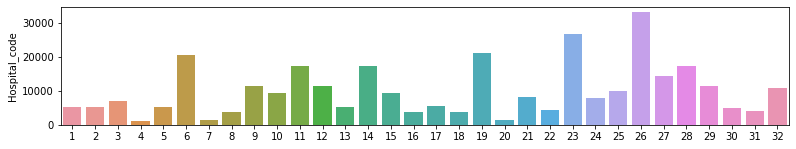

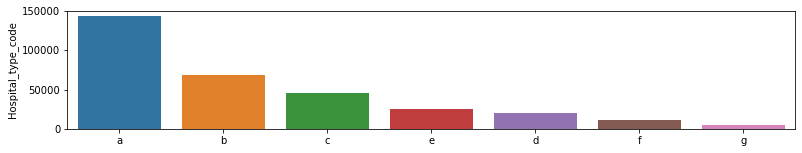

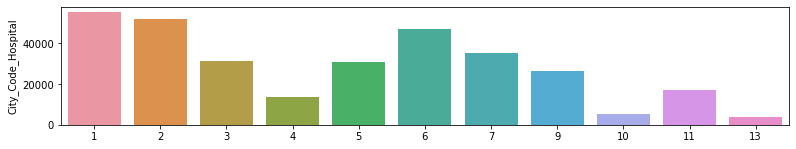

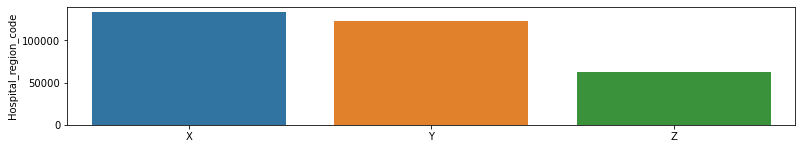

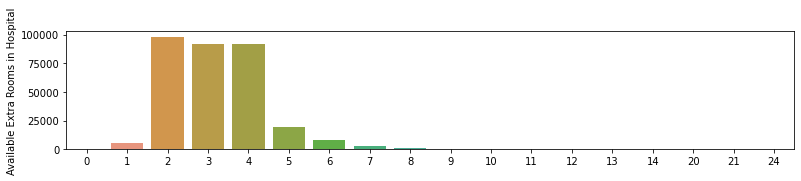

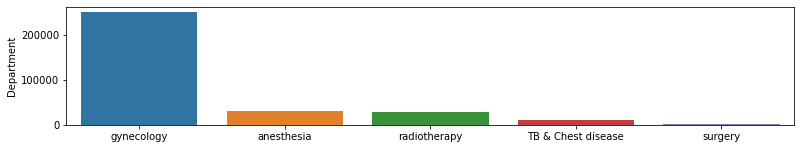

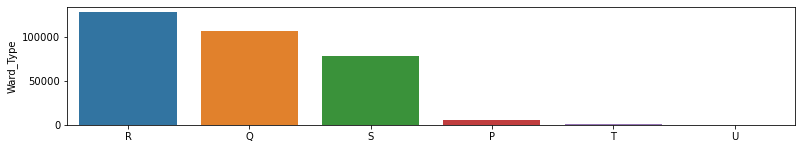

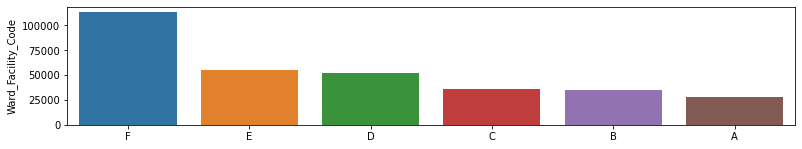

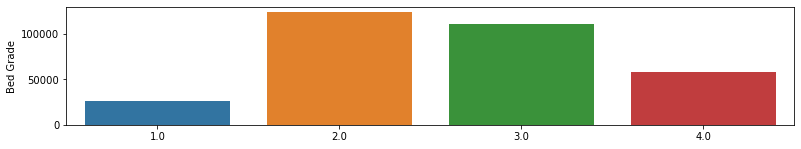

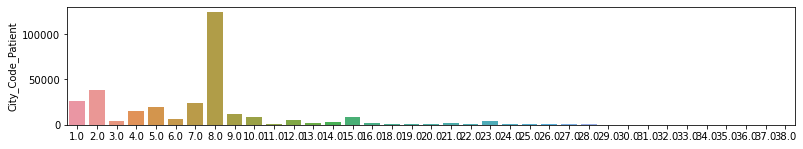

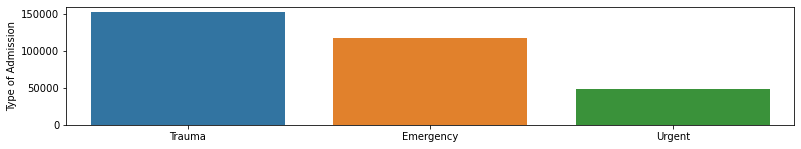

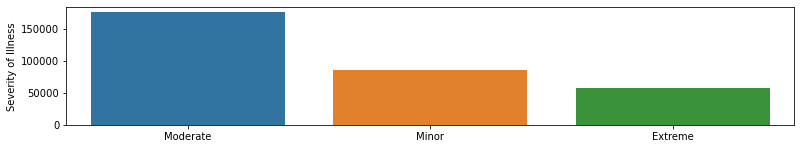

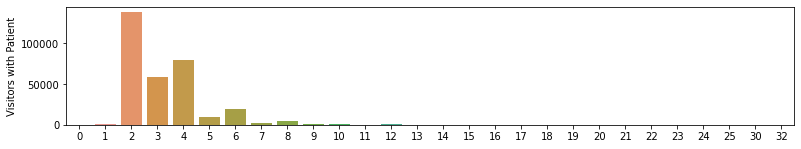

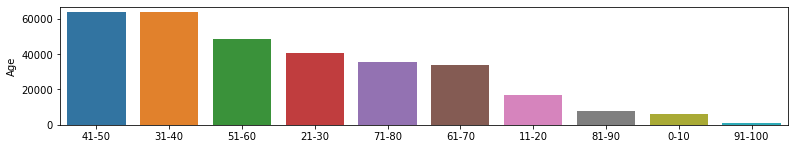

KeyboardInterrupt: 

In [13]:
i = 1
for column in train_data.columns[~(train_data.columns.isin(['case_id', 'patientid', 'admission_deposit']))].tolist():
    plt.figure(figsize = (60, 10))
    plt.subplot(4, 4, i)
    sns.barplot(x = train_data[column].value_counts().index, y = train_data[column].value_counts())
    i += 1
    plt.show()

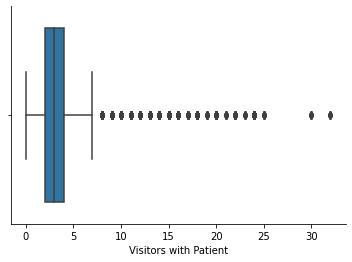

In [26]:
sns.boxplot(x = 'Visitors with Patient', data = train_data)
sns.despine()

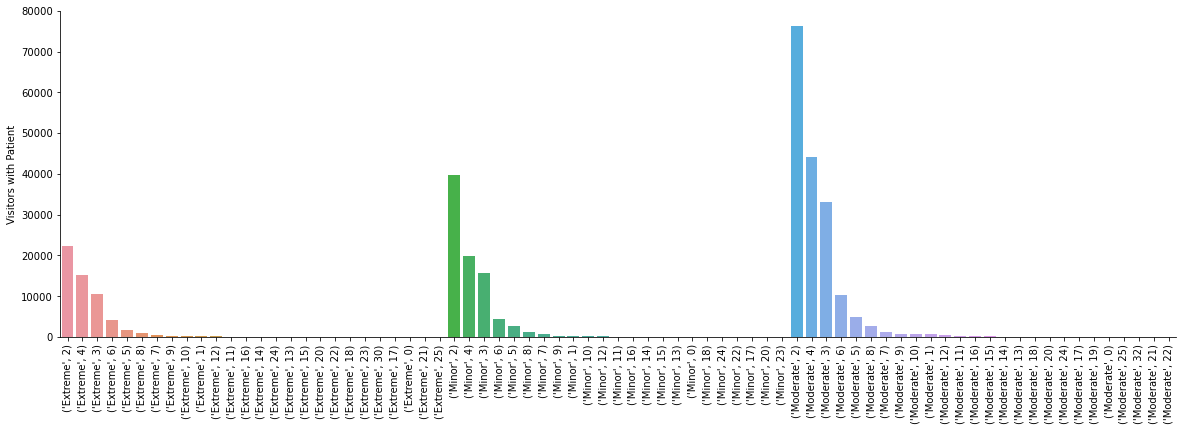

In [28]:
plt.figure(figsize = (20, 6))
sns.barplot(x = train_data.groupby(['Severity of Illness'])['Visitors_with_Patient'].value_counts().index, y = train_data.groupby(['Severity of Illness'])['Visitors with Patient'].value_counts())
plt.xticks(rotation = 90)
sns.despine()

In [11]:
train_data = train_data.dropna(axis=0, how='any')
test_data = test_data.dropna(axis=0, how='any')
train_data.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity of Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [12]:
train_data['City_Code_Patient'].astype(str)

0          7.0
1          7.0
2          7.0
3          7.0
4          7.0
          ... 
318433    23.0
318434     8.0
318435    10.0
318436     8.0
318437     8.0
Name: City_Code_Patient, Length: 313793, dtype: object

In [13]:
bedGrade = {1.0: '1' ,2.0: '2', 3.0: '3', 4.0: '4', np.nan: '5'}
train_data.replace({"Bed_Grade": bedGrade})

case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0             1              8                  c                   3   
1             2              2                  c                   5   
2             3             10                  e                   1   
3             4             26                  b                   2   
4             5             26                  b                   2   
...         ...            ...                ...                 ...   
318433   318434              6                  a                   6   
318434   318435             24                  a                   1   
318435   318436              7                  a                   4   
318436   318437             11                  b                   2   
318437   318438             19                  a                   7   

       Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0                         Z                                  3  radiotherapy   
1                         Z                                  2  radiotherapy   
2                         X                                  2    anesthesia   
3                         Y                                  2  radiotherapy   
4                         Y                                  2  radiotherapy   
...                     ...                                ...           ...   
318433                    X                                  3  radiotherapy   
318434                    X                                  2    anesthesia   
318435                    X                                  3    gynecology   
318436                    Y                                  3    anesthesia   
318437                    Y                                  5    gynecology   

       Ward_Type Ward_Facility_Code Bed_Grade  patientid  City_Code_Patient  \
0              R                  F         2      31397                7.0   
1              S                  F         2      31397                7.0   
2              S                  E         2      31397                7.0   
3              R                  D         2      31397                7.0   
4              S                  D         2      31397                7.0   
...          ...                ...       ...        ...                ...   
318433         Q                  F         4      86499               23.0   
318434         Q                  E         4        325                8.0   
318435         R                  F         4     125235               10.0   
318436         Q                  D         3      91081                8.0   
318437         Q                  C         2      21641                8.0   

       Type_of_Admission Severity of Illness  Visitors_with_Patient     Age  \
0              Emergency             Extreme                      2   51-60   
1                 Trauma             Extreme                      2   51-60   
2                 Trauma             Extreme                      2   51-60   
3                 Trauma             Extreme                      2   51-60   
4                 Trauma             Extreme                      2   51-60   
...                  ...                 ...                    ...     ...   
318433         Emergency            Moderate                      3   41-50   
318434            Urgent            Moderate                      4   81-90   
318435         Emergency               Minor                      3   71-80   
318436            Trauma               Minor                      5  Nov-20   
318437         Emergency               Minor                      2  Nov-20   

        Admission_Deposit    Stay  
0                    4911    0-10  
1                    5954   41-50  
2                    4745   31-40  
3                    7272   41-50  
4                    5558   41-50  
...                   ...     ...  
318433              

In [14]:
for col in train_data.columns[~(train_data.columns.isin(['case_id', 'patientid', 'admission_deposit']))].tolist():
    print(" Unique Values --> " + col, ':', len(train_data[col].unique()), ': ', train_data[col].unique())

 Unique Values --> Hospital_code : 32 :  [ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]
 Unique Values --> Hospital_type_code : 7 :  ['c' 'e' 'b' 'a' 'f' 'd' 'g']
 Unique Values --> City_Code_Hospital : 11 :  [ 3  5  1  2  6  9 10  4 11  7 13]
 Unique Values --> Hospital_region_code : 3 :  ['Z' 'X' 'Y']
 Unique Values --> Available Extra Rooms in Hospital : 18 :  [ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]
 Unique Values --> Department : 5 :  ['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
 Unique Values --> Ward_Type : 6 :  ['R' 'S' 'Q' 'P' 'T' 'U']
 Unique Values --> Ward_Facility_Code : 6 :  ['F' 'E' 'D' 'B' 'A' 'C']
 Unique Values --> Bed_Grade : 4 :  [2. 3. 4. 1.]
 Unique Values --> City_Code_Patient : 37 :  [ 7.  8.  2.  5.  6.  3.  4.  1.  9. 14. 25. 15. 12. 10. 28. 24. 23. 20.
 11. 13. 21. 18. 16. 26. 27. 22. 19. 31. 34. 32. 30. 29. 37. 33. 35. 36.
 38.]
 Unique Values --> Type_of_Admissio

In [15]:
train_data.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed_Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type_of_Admission                     object
Severity of Illness                   object
Visitors_with_Patient                  int64
Age                                   object
Admission_Deposit                      int64
Stay                                  object
dtype: object

In [16]:
train_data['City_Code_Patient'] = train_data['City_Code_Patient'].astype('str')
train_data['City_Code_Patient']

0          7.0
1          7.0
2          7.0
3          7.0
4          7.0
          ... 
318433    23.0
318434     8.0
318435    10.0
318436     8.0
318437     8.0
Name: City_Code_Patient, Length: 313793, dtype: object

In [17]:
train_data = train_data.fillna('NaN')
test_data = test_data.fillna('NaN')

for column in train_data.columns[~(train_data.columns.isin(['case_id', 'Stay']))].tolist():

    le = LabelEncoder()

    if column == 'City_Code_Patient':
        train_data['City_Code_Patient'] = train_data['City_Code_Patient'].astype('str')
        test_data['City_Code_Patient'] = test_data['City_Code_Patient'].astype('str')
        train_data['City_Code_Patient'] = le.fit_transform(train_data['City_Code_Patient'])
        test_data['City_Code_Patient'] = le.fit_transform(test_data['City_Code_Patient'])
    
    elif column == 'Bed Grade':
        bedGrade = {1.0: '1',2.0: '2', 3.0: '3', 4.0: '4', np.nan: '5'}
        train_data['Bed_Grade'] = train_data['Bed_Grade'].map(bedGrade)
        test_data['Bed_Grade'] = test_data['Bed_Grade'].map(bedGrade)
        train_data['Bed_Grade'] = train_data['Bed_Grade'].fillna('NaN')
        test_data['Bed_Grade'] = test_data['Bed_Grade'].fillna('NaN')
    
    else:
        train_data[column] = le.fit_transform(train_data[column])
        test_data[column] = le.fit_transform(test_data[column])

In [18]:
train_data.head()

case_id  Hospital_code  Hospital_type_code  City_Code_Hospital  \
0        1              7                   2                   2   
1        2              1                   2                   4   
2        3              9                   4                   0   
3        4             25                   1                   1   
4        5             25                   1                   1   

   Hospital_region_code  Available Extra Rooms in Hospital  Department  \
0                     2                                  3           3   
1                     2                                  2           3   
2                     0                                  2           1   
3                     1                                  2           3   
4                     1                                  2           3   

   Ward_Type  Ward_Facility_Code  Bed_Grade  patientid  City_Code_Patient  \
0          2                   5          1      21564                 34   
1          3                   5          1      21564                 34   
2          3                   4          1      21564                 34   
3          2                   3          1      21564                 34   
4          3                   3          1      21564                 34   

   Type_of_Admission  Severity of Illness  Visitors_with_Patient  Age  \
0                  0                    0                      2    4   
1                  1                    0                      2    4   
2                  1                    0                      2    4   
3                  1                    0                      2    4   
4                  1                    0                      2    4   

   Admission_Deposit   Stay  
0               2949   0-10  
1               3992  41-50  
2               2783  31-40  
3               5310  41-50  
4               3596  41-50

In [19]:
#train_data.drop(['Bed Grade'] , axis = 1, inplace = True)
train_data.head()

case_id  Hospital_code  Hospital_type_code  City_Code_Hospital  \
0        1              7                   2                   2   
1        2              1                   2                   4   
2        3              9                   4                   0   
3        4             25                   1                   1   
4        5             25                   1                   1   

   Hospital_region_code  Available Extra Rooms in Hospital  Department  \
0                     2                                  3           3   
1                     2                                  2           3   
2                     0                                  2           1   
3                     1                                  2           3   
4                     1                                  2           3   

   Ward_Type  Ward_Facility_Code  Bed_Grade  patientid  City_Code_Patient  \
0          2                   5          1      21564                 34   
1          3                   5          1      21564                 34   
2          3                   4          1      21564                 34   
3          2                   3          1      21564                 34   
4          3                   3          1      21564                 34   

   Type_of_Admission  Severity of Illness  Visitors_with_Patient  Age  \
0                  0                    0                      2    4   
1                  1                    0                      2    4   
2                  1                    0                      2    4   
3                  1                    0                      2    4   
4                  1                    0                      2    4   

   Admission_Deposit   Stay  
0               2949   0-10  
1               3992  41-50  
2               2783  31-40  
3               5310  41-50  
4               3596  41-50

In [20]:
ss = StandardScaler()

for column in train_data.columns[~(train_data.columns.isin(['case_id', 'Stay']))].tolist():
    train_data[[column]] = ss.fit_transform(train_data[[column]])
    test_data[[column]] = ss.fit_transform(test_data[[column]])

### Model Feature Importance with Shap

In [23]:
# Partitioning the features and the target

X = pd.DataFrame(train_data[["Ward_Type", "Bed_Grade", "Type_of_Admission", "Visitors_with_Patient", "Admission_Deposit"]])
y = train_data['Stay'].values

In [24]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=2018)

In [25]:
params = { 'iterations':5,
         'learning_rate':0.5,
         'depth':2,
         'eval_metric':'AUC',
         'verbose':True
         }

model_classifier = CatBoostClassifier(**params)
model_classifier.fit(X_train,y_train,
                    eval_set=(X_test,y_test),
                    use_best_model = True,
                    plot=True
                    );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6664446	best: 0.6664446 (0)	total: 1.57s	remaining: 6.29s
1:	test: 0.7276738	best: 0.7276738 (1)	total: 2.15s	remaining: 3.23s
2:	test: 0.7530644	best: 0.7530644 (2)	total: 2.76s	remaining: 1.84s
3:	test: 0.7669529	best: 0.7669529 (3)	total: 3.34s	remaining: 836ms
4:	test: 0.7724982	best: 0.7724982 (4)	total: 4.07s	remaining: 0us

bestTest = 0.7724982129
bestIteration = 4



In [26]:
y_pred = model_classifier.predict(X_test)
y_pred

array([['21-30'],
       ['21-30'],
       ['Nov-20'],
       ...,
       ['21-30'],
       ['Nov-20'],
       ['21-30']], dtype=object)

In [27]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
c_m = confusion_matrix(y_test , y_pred,labels=np.unique(y_pred))
c_r = classification_report(y_test , y_pred, labels=np.unique(y_pred))
a_c = accuracy_score(y_test , y_pred)

print(c_m , c_r , a_c)

[[19935   179   443    21  5183]
 [ 7871  2087  3507    59  2862]
 [ 2337  1826  5047   130  1084]
 [  146   154   840   640   118]
 [14769   465   998     3  6779]]                     precision    recall  f1-score   support

             21-30       0.38      0.77      0.51     25761
             31-40       0.36      0.13      0.19     16386
             51-60       0.36      0.48      0.41     10424
More than 100 Days       0.48      0.34      0.40      1898
            Nov-20       0.34      0.29      0.32     23014

         micro avg       0.37      0.45      0.40     77483
         macro avg       0.38      0.40      0.36     77483
      weighted avg       0.36      0.45      0.37     77483
 0.3663557755635344


In [21]:
import shap
shap.initjs()

In [33]:
explainer = shap.TreeExplainer(model_classifier)
explainer

In [34]:
from catboost import CatBoostClassifier, Pool
shap_values = explainer.shap_values(Pool(X_train, y_train))#, cat_features=[0,-1])

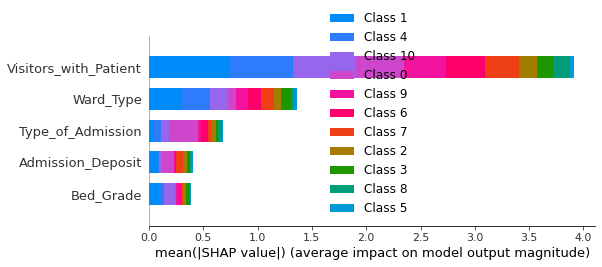

In [35]:
# feature importance plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [29]:
train_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'patientid', 'City_Code_Patient', 'Type_of_Admission',
       'Severity of Illness', 'Visitors_with_Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [30]:
import joblib
joblib.dump(model_classifier,'boost_covid1.pkl')

['boost_covid1.pkl']

In [31]:
import pickle
pickle_out=open("boost_covid1.pkl","wb")
pickle.dump(model_classifier,pickle_out)
pickle_out.close()

In [5]:
from tkinter import*
from PIL import ImageTk, Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
root=Tk()
#root.geometry("500x500")
root.configure(background="White")

def model(Ward_Type, Bed_Grade, Type_of_Admission, Visitors_with_Patient, Admission_Deposit):
    loaded_model = pickle.load(open("boost_covid1.pkl", "rb"))
    prediction = loaded_model.predict([[Ward_Type, Bed_Grade, Type_of_Admission,Visitors_with_Patient, Admission_Deposit]])  #order important
   
    notif1.configure(text=prediction)
   
        
Head1 = Label(root, text="AIS Solutions PVT LTD", font=('courier',24,"bold"),relief="solid").pack()
Head2 = Label(root,text="Covid 19 - Length of Stay",font=('courier',15,'bold'),relief="solid").pack()#pady=(10,0))

Ward_Type=Label(root,text="Ward Type",font=('Helvetica',10,'bold'),bg="purple",fg ="White",relief="solid",width=18).pack(pady=(10,0))
Ward_Type_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Ward_Type_input.pack()

Bed_Grade =Label(root,text="Bed Grade",font=('Helvetica',10,'bold'),bg="orange",fg ="White",relief="solid",width=18).pack()#pady=(30,0))
Bed_Grade_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Bed_Grade_input.pack()

Type_of_Admission=Label(root,text="Type of Admission",font=('Helvetica',10,'bold'),bg="grey",fg ="White", relief="solid",width=18).pack()#pady=(30,0))
Type_of_Admission_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Type_of_Admission_input.pack()

Visitors_with_Patient =Label(root,text="Visitors with Patient",font=('Helvetica',10,'bold'),bg="red",fg ="White",relief="solid",width=18).pack()#pady=(40,0))
Visitors_with_Patient_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Visitors_with_Patient_input.pack()

Admission_Deposit=Label(root,text="Admission Deposit",font=('Helvetica',10,'bold'),bg="green",fg ="White",relief="solid",width=18).pack()#pady=(20,0))
Admission_Deposit_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Admission_Deposit_input.pack()



but1 = Button(root,text="Predict",width="12", height="1",relief="solid",font=("Arial sans MS",14,"bold"),bg="orange",fg ="White",
                                                                                  command=lambda: model(Ward_Type_input.get(),
                                                                                  Bed_Grade_input.get(),
                                                                                  Type_of_Admission_input.get(),
                                                                                  Visitors_with_Patient_input.get(),
                                                                                  Admission_Deposit_input.get()))
#but2 = Button(root,text="Prediction is",width="20", height="2",command=lambda: model(Ward_Type_input.get(),Bed_Grade_input.get(),Type_of_Admission_input.get(),Visitors_with_Patient_input.get(),Admission_Deposit_input.get()))

Stay = Label(root, text="Length of Stay For The Patient Is In Hospital Is ",
             font=("Arial sans MS",14,"bold"),bg="grey",fg ="White")


notif1 = Label(root, text="                        ",font=("Arial sans MS",14,"bold"))

but1.pack()#pady="40")
#but2.pack()
Stay.pack()
notif1.pack(pady=(20,0))
root.resizable(0,0)
root.mainloop()

- ## Advantage :
> ### 1) Help to manage the functioning of Hospitals in a professional and optimal manner.
> ### 2) Prior knowledge of aid in logistics such as room and bed allocation planning.
> ### 3) Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning.
> ### 4) improve the efficiency of the healthcare management in a hospital.

- ## Disadvamtages :
> ### 1) The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.
> ### 2) Fluctuation may be occurs many times according to seriousness.
> ### 3) Covid patient mainly lives approx. 15-20 days in a hospital.

In [4]:
from tkinter import*
from PIL import ImageTk, Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
root=Tk()
#root.geometry("500x500")
root.configure(background="White")

def model(Ward_Type, Bed_Grade, Type_of_Admission, Visitors_with_Patient, Admission_Deposit):
    loaded_model = pickle.load(open("boost_covid1.pkl", "rb"))
    prediction = loaded_model.predict([[Ward_Type, Bed_Grade, Type_of_Admission,Visitors_with_Patient, Admission_Deposit]])  #order important
   
    if prediction != [0]:
        notif1.configure(text=prediction)
   
        
Head1 = Label(root, text="AIS Solutions PVT LTD", font=('Helvetica',24,"bold")).pack()
Head2 = Label(root,text="Covid 19",font=('Helvetica',15,'bold'),relief="solid").pack()#pady=(10,0))

Ward_Type=Label(root,text="Ward_Type",font=('Helvetica',10,'bold'),bg="light green",relief="solid",width=18).pack()#pady=(20,0))
Ward_Type_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Ward_Type_input.pack()

Bed_Grade =Label(root,text="Bed Grade",font=('Helvetica',10,'bold'),bg="light green",relief="solid",width=18).pack()#pady=(30,0))
Bed_Grade_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Bed_Grade_input.pack()

Type_of_Admission=Label(root,text="Type of Admission",font=('Helvetica',10,'bold'),bg="light green",relief="solid",width=18).pack()#pady=(30,0))
Type_of_Admission_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Type_of_Admission_input.pack()

Visitors_with_Patient =Label(root,text="Visitors with Patient",font=('Helvetica',10,'bold'),bg="light green",relief="solid",width=18).pack()#pady=(40,0))
Visitors_with_Patient_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Visitors_with_Patient_input.pack()

Admission_Deposit=Label(root,text="Admission_Deposit",font=('Helvetica',10,'bold'),bg="light green",relief="solid",width=18).pack()#pady=(20,0))
Admission_Deposit_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Admission_Deposit_input.pack()



but1 = Button(root,text="Prediction",width="20", height="2",command=lambda: model(Ward_Type_input.get(),Bed_Grade_input.get(),Type_of_Admission_input.get(),Visitors_with_Patient_input.get(),Admission_Deposit_input.get()))
notif1 = Label(root, text="",font=("Arial sans MS",14,"bold"))

but1.pack()#pady="40")
notif1.pack(pady=(40,0))
root.resizable(0,0)
root.mainloop()